In [3]:
# also load: _hourly, _monthly, _weekly, _yearly, or _live_daily
# load data. 
import pandas as pd 
mydata =pd.read_excel('../inputdata/EQ_last1yr_output.xlsx')



In [4]:
#data correction and filtering 
import pandas as pd 
colmnname="SYMBOL"
columnvalue="TITAN"

df=mydata[mydata[colmnname]==columnvalue]
df.to_csv("../out/Titan.csv")

print(df.head(10))
# sample datasets can be used in either of the long or wide import shapes
long = False
#df = load_daily(long=long)

        Unnamed: 0 SYMBOL SERIES     OPEN     HIGH      LOW    CLOSE     LAST  \
434497       27002  TITAN     EQ  2607.00  2616.00  2556.80  2565.75  2565.35   
434498       49049  TITAN     EQ  2568.00  2619.00  2555.05  2613.60  2618.80   
434499       71655  TITAN     EQ  2618.80  2626.25  2585.60  2597.55  2592.00   
434500       91621  TITAN     EQ  2591.00  2620.00  2543.65  2562.10  2565.20   
434501      116353  TITAN     EQ  2560.00  2584.40  2517.00  2538.10  2537.00   
434502      178362  TITAN     EQ  2529.95  2529.95  2467.80  2484.65  2489.95   
434503      202927  TITAN     EQ  2495.00  2498.70  2456.00  2468.20  2464.50   
434504      227762  TITAN     EQ  2473.00  2488.60  2431.00  2437.40  2434.95   
434505      247692  TITAN     EQ  2450.00  2475.00  2432.00  2446.60  2445.00   
434506      272323  TITAN     EQ  2456.90  2456.90  2400.00  2417.20  2420.00   

        PREVCLOSE  TOTTRDQTY     TOTTRDVAL    TIMESTAMP  TOTALTRADES  \
434497    2597.50     697408  1.7999

In [3]:

#reload the fidletere data for aster access
import pandas as pd 
df=pd.read_csv("../out/Titan.csv")
print(df.head)


<bound method NDFrame.head of     SYMBOL SERIES     OPEN     HIGH      LOW    CLOSE     LAST  PREVCLOSE  \
0    TITAN     EQ  2607.00  2616.00  2556.80  2565.75  2565.35    2597.50   
1    TITAN     EQ  2568.00  2619.00  2555.05  2613.60  2618.80    2565.75   
2    TITAN     EQ  2618.80  2626.25  2585.60  2597.55  2592.00    2613.60   
3    TITAN     EQ  2591.00  2620.00  2543.65  2562.10  2565.20    2597.55   
4    TITAN     EQ  2560.00  2584.40  2517.00  2538.10  2537.00    2562.10   
..     ...    ...      ...      ...      ...      ...      ...        ...   
257  TITAN     EQ  3818.95  3855.00  3800.00  3830.05  3825.10    3820.30   
258  TITAN     EQ  3791.35  3824.65  3718.85  3734.70  3737.90    3830.05   
259  TITAN     EQ  3742.20  3861.50  3740.70  3810.60  3816.00    3734.70   
260  TITAN     EQ  3833.95  3834.40  3780.00  3784.70  3786.00    3810.60   
261  TITAN     EQ  3786.00  3858.00  3705.75  3739.65  3737.90    3784.70   

     TOTTRDQTY     TOTTRDVAL  TIMESTAMP  TOTA

0          NaN
1          NaN
2          NaN
3          NaN
4      2575.42
        ...   
257    3766.76
258    3773.98
259    3790.90
260    3796.07
261    3779.94
Name: CLOSE, Length: 262, dtype: float64


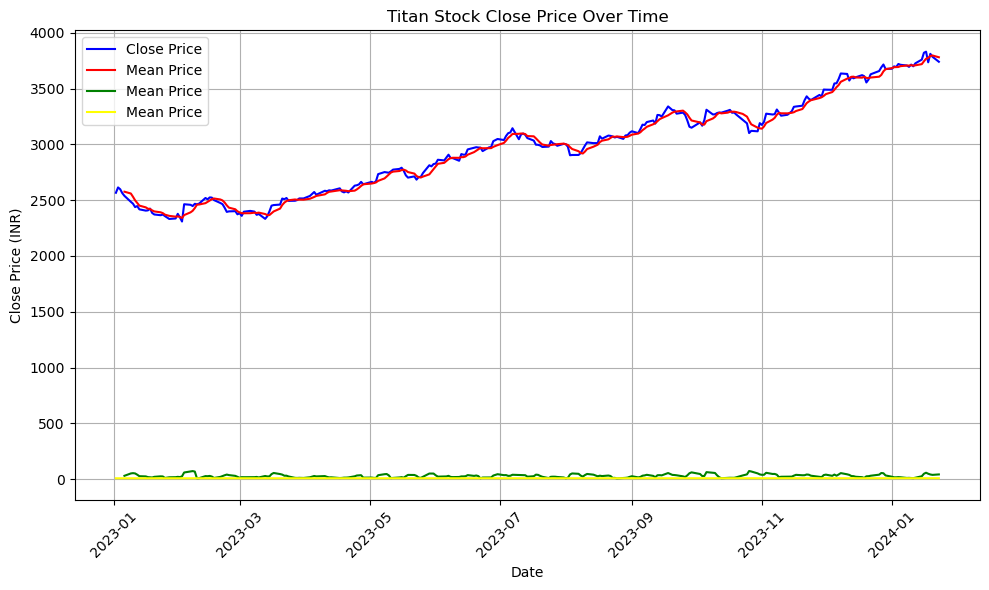

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading the CSV data
data = pd.read_csv("../out/Titan.csv") 
#data=df
# Converting 'TIMESTAMP' to datetime
data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'], format='%d-%b-%y')

# Sorting data by timestamp
data = data.sort_values(by='TIMESTAMP')
rolmean=data['CLOSE'].rolling(window=5).mean()
rolsd =data['CLOSE'].rolling(window=5).std()
datalog=np.log(data['CLOSE'])

print(rolmean)
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data['TIMESTAMP'], data['CLOSE'], color='blue', label='Close Price')
plt.plot(data['TIMESTAMP'], rolmean, color='red', label='Mean Price')
plt.plot(data['TIMESTAMP'], rolsd, color='green', label='Mean Price')
plt.plot(data['TIMESTAMP'], datalog, color='yellow', label='Log Price')

plt.title('Titan Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
from statsmodels.tsa.stattools import adfuller

dftest=adfuller(data['CLOSE'],autolag='AIC')
#print(sd)
print(dftest) 

# Interpret the results
if dftest[1] <= 0.05:
    print("Reject the null hypothesis (series is stationary)")
else:
    print("Fail to reject the null hypothesis (series is non-stationary)")


(0.16804391436927626, 0.9704112320178319, 3, 258, {'1%': -3.455952927706342, '5%': -2.8728086526320302, '10%': -2.572774990685656}, 2399.913383456884)
Fail to reject the null hypothesis (series is non-stationary)


<Figure size 1000x1200 with 0 Axes>

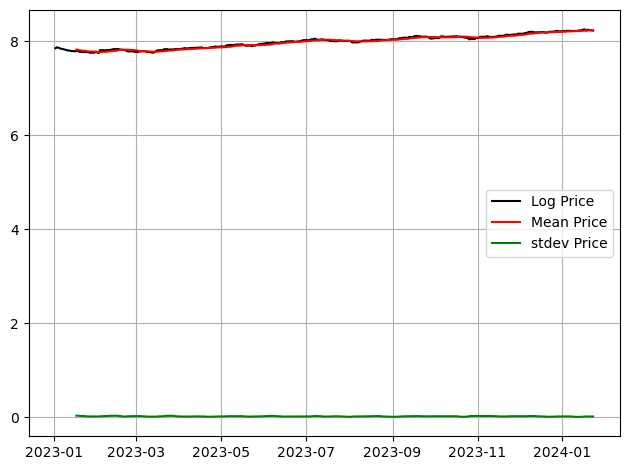

<Figure size 1000x1200 with 0 Axes>

In [19]:
import numpy as np 
datalog=np.log(data['CLOSE'])
rolmean=datalog.rolling(window=12).mean()
rolsd =datalog.rolling(window=12).std()
plt.plot(data['TIMESTAMP'], datalog, color='black', label='Log Price')
plt.plot(data['TIMESTAMP'], rolmean, color='red', label='Mean Price')
plt.plot(data['TIMESTAMP'], rolsd, color='green', label='stdev Price')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.figure(figsize=(10, 12))

KeyError: 'TIMESTAMP'

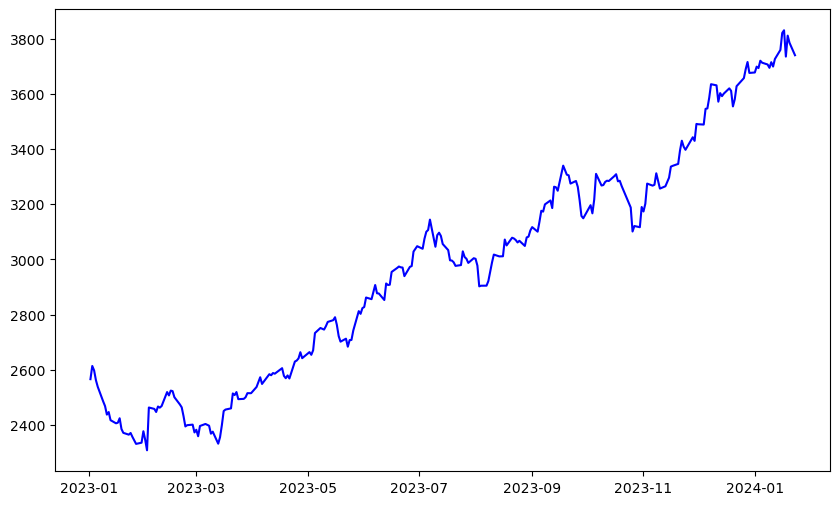

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(data['TIMESTAMP'], data['CLOSE'], color='blue', label='Close Price')
plt.plot(rolmean['TIMESTAMP'], rolmean['CLOSE'], color='red', label='Mean Price')
plt.title('Titan Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Using 4 cpus for n_jobs.
Data frequency is: B, used frequency is: B
Categorical features converted to numeric
Model Number: 1 with model AverageValueNaive in generation 0 of 4
Model Number: 2 with model AverageValueNaive in generation 0 of 4
Model Number: 3 with model AverageValueNaive in generation 0 of 4
Model Number: 4 with model DatepartRegression in generation 0 of 4
Model Number: 5 with model DatepartRegression in generation 0 of 4


/Users/i038849/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/i038849/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/i038849/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/i038849/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.wa

Model Number: 6 with model DatepartRegression in generation 0 of 4


/Users/i038849/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 7 with model DatepartRegression in generation 0 of 4
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 7 in generation 0: DatepartRegression
Model Number: 8 with model ETS in generation 0 of 4
Model Number: 9 with model ETS in generation 0 of 4
Model Number: 10 with model GLM in generation 0 of 4


/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


Model Number: 11 with model GLM in generation 0 of 4
Model Number: 12 with model GLS in generation 0 of 4
Model Number: 13 with model GLS in generation 0 of 4
Model Number: 14 with model LastValueNaive in generation 0 of 4
Model Number: 15 with model LastValueNaive in generation 0 of 4
Model Number: 16 with model LastValueNaive in generation 0 of 4
Model Number: 17 with model LastValueNaive in generation 0 of 4
Model Number: 18 with model SeasonalNaive in generation 0 of 4
Model Number: 19 with model SeasonalNaive in generation 0 of 4
Model Number: 20 with model SeasonalNaive in generation 0 of 4
Model Number: 21 with model VAR in generation 0 of 4
Template Eval Error: LinAlgError('3-th leading minor of the array is not positive definite') in model 21 in generation 0: VAR
Model Number: 22 with model VAR in generation 0 of 4
Template Eval Error: LinAlgError('3-th leading minor of the array is not positive definite') in model 22 in generation 0: VAR
Model Number: 23 with model VECM in ge

/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/vector_ar/vecm.py:1711: ComplexWarning: Casting complex values to real discards the imaginary part
  A[0] = pi + np.identity(K)


Model Number: 26 with model ConstantNaive in generation 0 of 4
Model Number: 27 with model DatepartRegression in generation 0 of 4
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 27 in generation 0: DatepartRegression
Model Number: 28 with model SeasonalNaive in generation 0 of 4


/Users/i038849/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 29 with model DatepartRegression in generation 0 of 4
Model Number: 30 with model ETS in generation 0 of 4
Model Number: 31 with model VECM in generation 0 of 4
Model Number: 32 with model UnivariateMotif in generation 0 of 4
Model Number: 33 with model UnivariateMotif in generation 0 of 4
Model Number: 34 with model SectionalMotif in generation 0 of 4
Model Number: 35 with model SectionalMotif in generation 0 of 4
Model Number: 36 with model SeasonalNaive in generation 0 of 4
Model Number: 37 with model DatepartRegression in generation 0 of 4
Model Number: 38 with model NVAR in generation 0 of 4
Model Number: 39 with model Cassandra in generation 0 of 4
Template Eval Error: ValueError('more than 1 year of data is required for holiday detection.') in model 39 in generation 0: Cassandra
Model Number: 40 with model SeasonalityMotif in generation 0 of 4
Model Number: 41 with model Cassandra in generation 0 of 4
Template Eval Error: ValueError('more than 1 year of data is req

/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 50 with model ETS in generation 0 of 4
Model Number: 51 with model VAR in generation 0 of 4
Template Eval Error: LinAlgError('4-th leading minor of the array is not positive definite') in model 51 in generation 0: VAR
Model Number: 52 with model VECM in generation 0 of 4
Template Eval Error: LinAlgError('Singular matrix') in model 52 in generation 0: VECM
Model Number: 53 with model WindowRegression in generation 0 of 4
Model Number: 54 with model DatepartRegression in generation 0 of 4


/Users/i038849/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.1171442958891955e+20, tolerance: 4.432203956512358e+16
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 55 with model UnivariateMotif in generation 0 of 4


/Users/i038849/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/i038849/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/i038849/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/i038849/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/i038849/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Model Number: 56 with model SectionalMotif in generation 0 of 4
Model Number: 57 with model NVAR in generation 0 of 4
Template Eval Error: ValueError('Model NVAR returned NaN for one or more series. fail_on_forecast_nan=True') in model 57 in generation 0: NVAR
Model Number: 58 with model MAR in generation 0 of 4
Template Eval Error: ValueError('Shape of passed values is (7, 14), indices imply (21, 14)') in model 58 in generation 0: MAR
Model Number: 59 with model RRVAR in generation 0 of 4
Model Number: 60 with model KalmanStateSpace in generation 0 of 4
Model Number: 61 with model MetricMotif in generation 0 of 4
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'zero', 'transformations': {'0': 'IntermittentOccurrence', '1': 'AlignLastValue', '2': 'AlignLastValue', '3': 'MinMaxScaler', '4': 'AlignLastValue'}, 'transformation_params': {'0': {'center': 'mean'}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.9, 'first_value_

/Users/i038849/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=4.53758e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 63 with model SeasonalityMotif in generation 0 of 4
Model Number: 64 with model FFT in generation 0 of 4
Template Eval Error: Exception("Transformer DifferencedTransformer failed on inverse from params fake_date {'0': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '1': {'model': 'Linear', 'phi': 1, 'window': 30, 'transform_dict': None}, '2': {}, '3': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}}") in model 64 in generation 0: FFT
Model Number: 65 with model BallTreeMultivariateMotif in generation 0 of 4
Template Eval Error: ValueError("Unrecognized metric '['euclidean']'") in model 65 in generation 0: BallTreeMultivariateMotif
Model Number: 66 with model DatepartRegression in generation 0 of 4
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 66 in generation 0: DatepartRegression
Model Number: 67 with model FFT in generation 0 of 4
Template Eval Error: Exception("Tra

/Users/i038849/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Users/i038849/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Users/i038849/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:553: RuntimeWarning: invalid value encountered in divide
  avg = avg_as_array = np.multiply(a, wgt,
/Users/i038849/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:553: RuntimeWarning: invalid value encountered in divide
  avg = avg_as_array = np.multiply(a, wgt,
/Users/i038849/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:553: RuntimeWarning: invalid value encountered in multiply
  avg = avg_as_array = np.multiply(a, wgt,
/Users/i038849/Library/Python/3.9/li

Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 70 in generation 0: UnivariateMotif
Model Number: 71 with model WindowRegression in generation 0 of 4
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 71 in generation 0: WindowRegression
Model Number: 72 with model FFT in generation 0 of 4
Model Number: 73 with model AverageValueNaive in generation 0 of 4
Model Number: 74 with model VAR in generation 0 of 4
Template Eval Error: LinAlgError('4-th leading minor of the array is not positive definite') in model 74 in generation 0: VAR
Model Number: 75 with model BallTreeMultivariateMotif in generation 0 of 4
Template Eval Error: ValueError("Unrecognized metric '['euclidean']'") in model 75 in generation 0: BallTreeMultivariateMotif
Model Number: 76 with model SeasonalNaive in generation 0 of 4
Model Number: 77 with model DatepartRegression in generation 0 of 4
Model Number: 78 with 

/Users/i038849/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


Model Number: 81 with model GLS in generation 0 of 4
Model Number: 82 with model UnivariateMotif in generation 0 of 4
Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 82 in generation 0: UnivariateMotif
Model Number: 83 with model RRVAR in generation 0 of 4
Model Number: 84 with model ConstantNaive in generation 0 of 4
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '1': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': None}, '2': {'rows': 2}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 84 in generation 0: ConstantNaive
Model Number: 85 with model LastValueNaive in generation 0 of 4
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params mean {'0': {}, '1': {'lag_1': 7, 'method': 'LastValue'}, 

/Users/i038849/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Users/i038849/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Users/i038849/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:553: RuntimeWarning: invalid value encountered in multiply
  avg = avg_as_array = np.multiply(a, wgt,
/Users/i038849/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:553: RuntimeWarning: invalid value encountered in divide
  avg = avg_as_array = np.multiply(a, wgt,
/Users/i038849/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Users/i038849/Libra

Model Number: 87 with model ETS in generation 0 of 4
Model Number: 88 with model GLS in generation 0 of 4
Model Number: 89 with model LastValueNaive in generation 0 of 4
Model Number: 90 with model SeasonalNaive in generation 0 of 4
Model Number: 91 with model ConstantNaive in generation 0 of 4
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params fake_date {'0': {}, '1': {'rows': 2, 'lag': 1, 'method': 'additive', 'strength': 0.9, 'first_value_only': False}, '2': {}, '3': {}, '4': {'threshold': 0.8, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': False, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': True, 'use_hebrew_holidays': False, 'anomaly_detector_params': {'method': 'rolling_zscore', 'method_params': {'distribution': 'norm', 'alpha': 0.05, 'rolling_periods': 300, 'center': False}, 'fillna': 'linear', 'transform_dict': {'transformations': {'0': 'Date

/Users/i038849/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/i038849/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 98 with model ConstantNaive in generation 0 of 4
Model Number: 99 with model SeasonalNaive in generation 0 of 4
Model Number: 100 with model KalmanStateSpace in generation 0 of 4
Model Number: 101 with model LastValueNaive in generation 0 of 4
Model Number: 102 with model ETS in generation 0 of 4
Model Number: 103 with model SectionalMotif in generation 0 of 4
Model Number: 104 with model AverageValueNaive in generation 0 of 4
Model Number: 105 with model GLS in generation 0 of 4
Model Number: 106 with model SectionalMotif in generation 0 of 4
Model Number: 107 with model ETS in generation 0 of 4
Model Number: 108 with model ConstantNaive in generation 0 of 4
Model Number: 109 with model DatepartRegression in generation 0 of 4
Model Number: 110 with model SeasonalNaive in generation 0 of 4
Model Number: 111 with model MetricMotif in generation 0 of 4
Model Number: 112 with model VECM in generation 0 of 4
Template Eval Error: Exception("Transformer Detrend failed on fit fr

/Users/i038849/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.089949603257752e+19, tolerance: 2.6540173162027418e+17
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 120 with model SeasonalNaive in generation 0 of 4
Model Number: 121 with model ConstantNaive in generation 0 of 4
Model Number: 122 with model BallTreeMultivariateMotif in generation 0 of 4
Template Eval Error: ValueError("Unrecognized metric '['euclidean']'") in model 122 in generation 0: BallTreeMultivariateMotif
Model Number: 123 with model ETS in generation 0 of 4
Model Number: 124 with model Cassandra in generation 0 of 4
Template Eval Error: ValueError('more than 1 year of data is required for holiday detection.') in model 124 in generation 0: Cassandra
Model Number: 125 with model ETS in generation 0 of 4
Model Number: 126 with model FFT in generation 0 of 4
Model Number: 127 with model LastValueNaive in generation 0 of 4
Model Number: 128 with model SectionalMotif in generation 0 of 4
Model Number: 129 with model FFT in generation 0 of 4
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'cubic', 'transformations': {'

/Users/i038849/Library/Python/3.9/lib/python/site-packages/autots/models/basics.py:2149: RuntimeWarning: invalid value encountered in sqrt
  df_stdev = np.sqrt(result.observations.cov).T
/Users/i038849/Library/Python/3.9/lib/python/site-packages/autots/models/basics.py:2175: RuntimeWarning: Mean of empty slice
  result_score = np.nansum(np.nanmean(upper_pl + lower_pl, axis=0) / scaler)


Model Number: 185 with model SeasonalityMotif in generation 1 of 4
Model Number: 186 with model DatepartRegression in generation 1 of 4
Model Number: 187 with model GLS in generation 1 of 4
Model Number: 188 with model LastValueNaive in generation 1 of 4
Model Number: 189 with model DatepartRegression in generation 1 of 4
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 189 in generation 1: DatepartRegression
Model Number: 190 with model LastValueNaive in generation 1 of 4
Model Number: 191 with model NVAR in generation 1 of 4
Model Number: 192 with model AverageValueNaive in generation 1 of 4
Model Number: 193 with model SeasonalNaive in generation 1 of 4
Model Number: 194 with model ETS in generation 1 of 4
Model Number: 195 with model RRVAR in generation 1 of 4
Model Number: 196 with model SectionalMotif in generation 1 of 4
Model Number: 197 with model AverageValueNaive in generation 1 of 4
Model Number: 198 with model Seas

/Users/i038849/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 216 with model Cassandra in generation 1 of 4
Template Eval Error: ValueError('more than 1 year of data is required for holiday detection.') in model 216 in generation 1: Cassandra
Model Number: 217 with model DatepartRegression in generation 1 of 4
Model Number: 218 with model DatepartRegression in generation 1 of 4
Model Number: 219 with model FFT in generation 1 of 4


/Users/i038849/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 355.2557373046875, tolerance: 0.3060000240802765
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 220 with model ETS in generation 1 of 4
Model Number: 221 with model AverageValueNaive in generation 1 of 4
Model Number: 222 with model ConstantNaive in generation 1 of 4
Model Number: 223 with model GLM in generation 1 of 4


/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value

Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 223 in generation 1: GLM
Model Number: 224 with model SeasonalNaive in generation 1 of 4
Model Number: 225 with model MetricMotif in generation 1 of 4
Model Number: 226 with model WindowRegression in generation 1 of 4
Model Number: 227 with model UnivariateMotif in generation 1 of 4
Model Number: 228 with model LastValueNaive in generation 1 of 4
Model Number: 229 with model DatepartRegression in generation 1 of 4
Model Number: 230 with model ConstantNaive in generation 1 of 4
Model Number: 231 with model ConstantNaive in generation 1 of 4


/Users/i038849/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 232 with model MetricMotif in generation 1 of 4
Model Number: 233 with model GLS in generation 1 of 4
Model Number: 234 with model ConstantNaive in generation 1 of 4
Model Number: 235 with model SectionalMotif in generation 1 of 4
Model Number: 236 with model WindowRegression in generation 1 of 4
Model Number: 237 with model ETS in generation 1 of 4
Model Number: 238 with model GLS in generation 1 of 4
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'part': 'trend', 'lamb': 1600}, '1': {'model_name': 'AR(2)', 'state_transition': [[1, 1], [0.1, 0]], 'process_noise': [[1, 0], [0, 0]], 'observation_model': [[1, 0]], 'observation_noise': 1.0, 'em_iter': 10}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '4': {}}") in model 238 in generation 1: GLS
Model Number: 239 with model MetricMo

/Users/i038849/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/i038849/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 309 with model SeasonalityMotif in generation 2 of 4
Model Number: 310 with model FFT in generation 2 of 4
Model Number: 311 with model DatepartRegression in generation 2 of 4
Model Number: 312 with model LastValueNaive in generation 2 of 4
Model Number: 313 with model AverageValueNaive in generation 2 of 4
Model Number: 314 with model AverageValueNaive in generation 2 of 4
Model Number: 315 with model UnivariateMotif in generation 2 of 4
Model Number: 316 with model NVAR in generation 2 of 4
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'time', 'transformations': {'0': 'SeasonalDifference', '1': 'AlignLastValue', '2': 'EWMAFilter'}, 'transformation_params': {'0': {'lag_1': 12, 'method': 'LastValue'}, '1': {'rows': 1, 'lag': 7, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '2': {'span': 12}}}. fail_on_forecast_nan=True") in model 316 in generation 2: NVAR
Model Number: 317 with model KalmanStat

/Users/i038849/Library/Python/3.9/lib/python/site-packages/autots/tools/fast_kalman.py:1092: RuntimeWarning: overflow encountered in cast
  result.smoothed.states.cov[:, j, :, :] = Ps
/Users/i038849/Library/Python/3.9/lib/python/site-packages/autots/tools/fast_kalman.py:1098: RuntimeWarning: overflow encountered in cast
  result.smoothed.observations.cov[:, j, :, :] = obs_cov
/Users/i038849/Library/Python/3.9/lib/python/site-packages/autots/tools/fast_kalman.py:1309: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/Users/i038849/Library/Python/3.9/lib/python/site-packages/autots/tools/fast_kalman.py:1296: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/Users/i038849/Library/Python/3.9/lib/python/site-packages/autots/tools/fast_kalman.py:1296: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/Users/i038849/Library/Python/3.9/lib/python/site-packages/autots/tools/fast_kalman.py:1314: Runtime

Model Number: 319 with model SeasonalNaive in generation 2 of 4
Model Number: 320 with model SeasonalNaive in generation 2 of 4
Model Number: 321 with model UnivariateMotif in generation 2 of 4
Model Number: 322 with model ETS in generation 2 of 4
Model Number: 323 with model WindowRegression in generation 2 of 4
Model Number: 324 with model MetricMotif in generation 2 of 4
Model Number: 325 with model LastValueNaive in generation 2 of 4
Model Number: 326 with model FFT in generation 2 of 4
Model Number: 327 with model ConstantNaive in generation 2 of 4
Model Number: 328 with model RRVAR in generation 2 of 4
Model Number: 329 with model RRVAR in generation 2 of 4
Model Number: 330 with model SeasonalityMotif in generation 2 of 4
Model Number: 331 with model UnivariateMotif in generation 2 of 4
Model Number: 332 with model KalmanStateSpace in generation 2 of 4
Model Number: 333 with model ETS in generation 2 of 4
Model Number: 334 with model SectionalMotif in generation 2 of 4
Template 

/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


Model Number: 337 with model SectionalMotif in generation 2 of 4
Model Number: 338 with model DatepartRegression in generation 2 of 4
Model Number: 339 with model ConstantNaive in generation 2 of 4
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'cubic', 'transformations': {'0': 'DatepartRegression', '1': 'AlignLastValue', '2': 'AlignLastValue'}, 'transformation_params': {'0': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'expanded', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False}, '1': {'rows': 1, 'lag': 28, 'method': 'additive', 'strength': 0.5, 'first_value_only': False}, '2': {'rows': 7, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}}}. fail_on_forecast_nan=True") in model 339 in generation 2: ConstantNaive
Model Number: 340 with model SeasonalNaive in generation 2 of 4
Model Number: 341 with model SeasonalNaive in generatio

/Users/i038849/Library/Python/3.9/lib/python/site-packages/autots/models/basics.py:2232: RuntimeWarning: invalid value encountered in sqrt
  df_stdev = np.sqrt(result.observations.cov).T


Model Number: 347 with model AverageValueNaive in generation 2 of 4
Model Number: 348 with model NVAR in generation 2 of 4
Model Number: 349 with model Cassandra in generation 2 of 4
Model Number: 350 with model ETS in generation 2 of 4


/Users/i038849/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/i038849/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 351 with model GLS in generation 2 of 4
Model Number: 352 with model LastValueNaive in generation 2 of 4
Model Number: 353 with model AverageValueNaive in generation 2 of 4
Model Number: 354 with model LastValueNaive in generation 2 of 4
Model Number: 355 with model KalmanStateSpace in generation 2 of 4
Model Number: 356 with model DatepartRegression in generation 2 of 4
Model Number: 357 with model MetricMotif in generation 2 of 4


/Users/i038849/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 208.4832000732422, tolerance: 0.3060000240802765
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 358 with model AverageValueNaive in generation 2 of 4
Model Number: 359 with model DatepartRegression in generation 2 of 4
Model Number: 360 with model WindowRegression in generation 2 of 4
Model Number: 361 with model SectionalMotif in generation 2 of 4
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 361 in generation 2: SectionalMotif
Model Number: 362 with model GLM in generation 2 of 4
Model Number: 363 with model SeasonalNaive in generation 2 of 4
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '1': {}, '2': {'decimals': 0, 'on_transform': True, 'on_inverse': True}, '3': {}, '4': {}}") in model 363 in generation 2: SeasonalNaive


/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value

Model Number: 364 with model SectionalMotif in generation 2 of 4
Model Number: 365 with model LastValueNaive in generation 2 of 4
Model Number: 366 with model NVAR in generation 2 of 4
Model Number: 367 with model RRVAR in generation 2 of 4
Model Number: 368 with model UnivariateMotif in generation 2 of 4
Template Eval Error: LinAlgError('Singular matrix') in model 368 in generation 2: UnivariateMotif
Model Number: 369 with model SeasonalityMotif in generation 2 of 4
Model Number: 370 with model ConstantNaive in generation 2 of 4
Model Number: 371 with model GLM in generation 2 of 4
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 371 in generation 2: GLM
Model Number: 372 with model ETS in generation 2 of 4
Model Number: 373 with model NVAR in generation 2 of 4
Template Eval Error: ValueError('Model NVAR returned NaN for one or more series. fail_on_forecast_nan=True') in model 373 in generation 2: NVAR
New Generation: 3 of 4
Model Number:

/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered 

Model Number: 437 with model LastValueNaive in generation 3 of 4
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params time {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'rows': 7, 'displacement_rows': 1, 'quantile': 0, 'decay_span': 90}, '2': {'n_harmonics': -0.95, 'detrend': 'quadratic'}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 437 in generation 3: LastValueNaive
Model Number: 438 with model MetricMotif in generation 3 of 4
Model Number: 439 with model SeasonalityMotif in generation 3 of 4
Model Number: 440 with model SectionalMotif in generation 3 of 4
Model Number: 441 with model SeasonalNaive in generation 3 of 4
Model Number: 442 with model ETS in generation 3 of 4
Model Number: 443 with model ETS in generation 3 of 4
Model Number: 444 with model SeasonalityMotif in generation 3 of 4
Model Number: 445 with model Cassandra in gen

/Users/i038849/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/i038849/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 446 with model LastValueNaive in generation 3 of 4
Model Number: 447 with model Cassandra in generation 3 of 4


/Users/i038849/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/i038849/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 448 with model AverageValueNaive in generation 3 of 4
Model Number: 449 with model KalmanStateSpace in generation 3 of 4
Model Number: 450 with model GLM in generation 3 of 4


/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


Model Number: 451 with model SectionalMotif in generation 3 of 4
Model Number: 452 with model SectionalMotif in generation 3 of 4
Model Number: 453 with model NVAR in generation 3 of 4
Model Number: 454 with model SeasonalNaive in generation 3 of 4
Model Number: 455 with model GLS in generation 3 of 4
Model Number: 456 with model NVAR in generation 3 of 4
Template Eval Error: ValueError('Model NVAR returned NaN for one or more series. fail_on_forecast_nan=True') in model 456 in generation 3: NVAR
Model Number: 457 with model ConstantNaive in generation 3 of 4
Model Number: 458 with model SeasonalityMotif in generation 3 of 4
Model Number: 459 with model SeasonalityMotif in generation 3 of 4
Model Number: 460 with model FFT in generation 3 of 4
Model Number: 461 with model NVAR in generation 3 of 4
Model Number: 462 with model MetricMotif in generation 3 of 4
Model Number: 463 with model SectionalMotif in generation 3 of 4
Model Number: 464 with model FFT in generation 3 of 4
Model Numb

/Users/i038849/Library/Python/3.9/lib/python/site-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered in scalar power
  (1 + mean_perc_decrease) ** self.mean_weight
/Users/i038849/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/i038849/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/i038849/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/i038849/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/i038849/Library/Python/3.9/lib/python/site-packa

Model Number: 480 with model GLM in generation 3 of 4


/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/families/family.py:143: Runt

Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 480 in generation 3: GLM
Model Number: 481 with model Cassandra in generation 3 of 4
Model Number: 482 with model LastValueNaive in generation 3 of 4
Model Number: 483 with model ETS in generation 3 of 4
New Generation: 4 of 4
Model Number: 484 with model DatepartRegression in generation 4 of 4
Model Number: 485 with model KalmanStateSpace in generation 4 of 4
Model Number: 486 with model UnivariateMotif in generation 4 of 4
Model Number: 487 with model ConstantNaive in generation 4 of 4
Model Number: 488 with model LastValueNaive in generation 4 of 4
Model Number: 489 with model SeasonalityMotif in generation 4 of 4
Model Number: 490 with model SectionalMotif in generation 4 of 4
Model Number: 491 with model RRVAR in generation 4 of 4
Model Number: 492 with model SeasonalNaive in generation 4 of 4
Model Number: 493 with model AverageValueNaive in generation 4 of 4
Model Nu

/Users/i038849/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=4.53758e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 516 with model LastValueNaive in generation 4 of 4
Model Number: 517 with model MetricMotif in generation 4 of 4
Template Eval Error: ZeroDivisionError("Weights sum to zero, can't be normalized") in model 517 in generation 4: MetricMotif
Model Number: 518 with model DatepartRegression in generation 4 of 4
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'expanded', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False}, '1': {}, '2': {}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '4': {'output_distribution': 'normal', 'n_quantiles': 85}}") in model 518 in generation 4: DatepartRegression
Model Number: 519 with model KalmanStateSpace in generation 4 of 4
Model Number: 520 with model SeasonalNaive in generation 4 of 4
Model Number: 521 with model ConstantNaive i

/Users/i038849/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=4.53758e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 535 with model KalmanStateSpace in generation 4 of 4
Model Number: 536 with model LastValueNaive in generation 4 of 4
Model Number: 537 with model MetricMotif in generation 4 of 4
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params zero {'0': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '1': {}, '2': {}}") in model 537 in generation 4: MetricMotif
Model Number: 538 with model ETS in generation 4 of 4
Model Number: 539 with model DatepartRegression in generation 4 of 4
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 539 in generation 4: DatepartRegression
Model Number: 540 with model LastValueNaive in generation 4 of 4
Model Number: 541 with model RRVAR in generation 4 of 4
Model Number: 542 with model AverageValueNaive in generation 4 of 4
Model Number: 543 with model MetricMotif in generation 4 of 4
Model Number: 544 with model Secti

/Users/i038849/Library/Python/3.9/lib/python/site-packages/autots/tools/impute.py:55: RuntimeWarning: Mean of empty slice
  arr = np.nan_to_num(arr) + np.isnan(arr) * np.nan_to_num(np.nanmean(arr, axis=0))


Model Number: 547 with model SectionalMotif in generation 4 of 4
Model Number: 548 with model ETS in generation 4 of 4
Model Number: 549 with model KalmanStateSpace in generation 4 of 4
Model Number: 550 with model Cassandra in generation 4 of 4
Template Eval Error: ValueError('more than 1 year of data is required for holiday detection.') in model 550 in generation 4: Cassandra
Model Number: 551 with model Cassandra in generation 4 of 4
Template Eval Error: ValueError('negative dimensions are not allowed') in model 551 in generation 4: Cassandra
Model Number: 552 with model AverageValueNaive in generation 4 of 4
Model Number: 553 with model FFT in generation 4 of 4


/Users/i038849/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/i038849/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 554 with model UnivariateMotif in generation 4 of 4
Model Number: 555 with model ConstantNaive in generation 4 of 4
Model Number: 556 with model ConstantNaive in generation 4 of 4
Model Number: 557 with model SectionalMotif in generation 4 of 4
Model Number: 558 with model UnivariateMotif in generation 4 of 4
Model Number: 559 with model Cassandra in generation 4 of 4
Template Eval Error: LinAlgError('Singular matrix') in model 559 in generation 4: Cassandra
Model Number: 560 with model MetricMotif in generation 4 of 4
Model Number: 561 with model NVAR in generation 4 of 4
Template Eval Error: ValueError('Model NVAR returned NaN for one or more series. fail_on_forecast_nan=True') in model 561 in generation 4: NVAR
Model Number: 562 with model SeasonalityMotif in generation 4 of 4


/Users/i038849/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/i038849/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 563 with model LastValueNaive in generation 4 of 4
Model Number: 564 with model SeasonalityMotif in generation 4 of 4
Model Number: 565 with model LastValueNaive in generation 4 of 4
Model Number: 566 with model RRVAR in generation 4 of 4
Model Number: 567 with model KalmanStateSpace in generation 4 of 4
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'fake_date', 'transformations': {'0': 'AlignLastValue', '1': 'StandardScaler', '2': 'AlignLastValue', '3': 'IntermittentOccurrence'}, 'transformation_params': {'0': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '1': {}, '2': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '3': {'center': 'mean'}}}. fail_on_forecast_nan=True") in model 567 in generation 4: KalmanStateSpace
Model Number: 568 with model LastValueNaive in generation 4 of 4
Model Number: 569 with model NVAR in generatio

/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero e

Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 572 in generation 4: GLM
Model Number: 573 with model SectionalMotif in generation 4 of 4
Model Number: 574 with model ConstantNaive in generation 4 of 4
Model Number: 575 with model ETS in generation 4 of 4
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'rows': 1, 'lag': 28, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '1': {'output_distribution': 'normal', 'n_quantiles': 85}}") in model 575 in generation 4: ETS
Model Number: 576 with model SeasonalityMotif in generation 4 of 4
Model Number: 577 with model MetricMotif in generation 4 of 4
Model Number: 578 with model SeasonalityMotif in generation 4 of 4
Model Number: 579 with model DatepartRegression in generation 4 of 4
Model Number: 580 with model AverageValueNaive in generation 4 of 4
Model Number: 581 with model DatepartRegression in generatio

/Users/i038849/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8534286070507897e+19, tolerance: 6511505965056000.0
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 582 with model ConstantNaive in generation 4 of 4
Model Number: 583 with model SeasonalityMotif in generation 4 of 4
Model Number: 584 with model ConstantNaive in generation 4 of 4
Model Number: 585 with model SeasonalNaive in generation 4 of 4
Model Number: 586 with model SeasonalityMotif in generation 4 of 4
Model Number: 587 with model WindowRegression in generation 4 of 4
Model Number: 588 with model UnivariateMotif in generation 4 of 4
Model Number: 589 with model SectionalMotif in generation 4 of 4
Model Number: 590 with model NVAR in generation 4 of 4
Model Number: 591 with model Cassandra in generation 4 of 4
Model Number: 592 with model DatepartRegression in generation 4 of 4
Model Number: 593 with model FFT in generation 4 of 4


/Users/i038849/Library/Python/3.9/lib/python/site-packages/autots/models/ensemble.py:1181: FutureWarning: The behavior of DataFrame.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  cr_df = pd.DataFrame(per_series_des.idxmin()).transpose()
/Users/i038849/Library/Python/3.9/lib/python/site-packages/autots/models/ensemble.py:1183: FutureWarning: The behavior of DataFrame.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  models_pos.extend(per_series_des.idxmin().tolist())
/Users/i038849/Library/Python/3.9/lib/python/site-packages/autots/models/ensemble.py:1181: FutureWarning: The behavior of DataFrame.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  cr_df = pd.DataFrame(per_series_des.idxmin()).transpose()
/Users/i038849/Library/Python/3.9/lib/python/site-packages/autots/models/ensemb

Model Number: 594 with model Ensemble in generation 5 of Ensembles
Model Number: 595 with model Ensemble in generation 5 of Ensembles
Model Number: 596 with model Ensemble in generation 5 of Ensembles


/Users/i038849/Library/Python/3.9/lib/python/site-packages/autots/models/basics.py:2232: RuntimeWarning: invalid value encountered in sqrt
  df_stdev = np.sqrt(result.observations.cov).T


Model Number: 597 with model Ensemble in generation 5 of Ensembles


/Users/i038849/Library/Python/3.9/lib/python/site-packages/autots/models/basics.py:2232: RuntimeWarning: invalid value encountered in sqrt
  df_stdev = np.sqrt(result.observations.cov).T


Model Number: 598 with model Ensemble in generation 5 of Ensembles
Model Number: 599 with model Ensemble in generation 5 of Ensembles
Model Number: 600 with model Ensemble in generation 5 of Ensembles
Model Number: 601 with model Ensemble in generation 5 of Ensembles
Model Number: 602 with model Ensemble in generation 5 of Ensembles
Model Number: 603 with model Ensemble in generation 5 of Ensembles
Model Number: 604 with model Ensemble in generation 5 of Ensembles


/Users/i038849/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=4.53758e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 605 with model Ensemble in generation 5 of Ensembles
Model Number: 606 with model Ensemble in generation 5 of Ensembles


/Users/i038849/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=4.53758e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 607 with model Ensemble in generation 5 of Ensembles
Model Number: 608 with model Ensemble in generation 5 of Ensembles
Validation Round: 1
Model Number: 1 of 106 with model DatepartRegression for Validation 1
📈 1 - DatepartRegression with avg smape 11.35: 
Model Number: 2 of 106 with model Ensemble for Validation 1
2 - Ensemble with avg smape 11.35: 
Model Number: 3 of 106 with model Ensemble for Validation 1
3 - Ensemble with avg smape 11.38: 
Model Number: 4 of 106 with model Ensemble for Validation 1
📈 4 - Ensemble with avg smape 9.26: 
Model Number: 5 of 106 with model Ensemble for Validation 1
5 - Ensemble with avg smape 11.02: 
Model Number: 6 of 106 with model Ensemble for Validation 1
6 - Ensemble with avg smape 9.46: 
Model Number: 7 of 106 with model Ensemble for Validation 1
7 - Ensemble with avg smape 11.43: 
Model Number: 8 of 106 with model KalmanStateSpace for Validation 1
8 - KalmanStateSpace with avg smape 11.2: 
Model Number: 9 of 106 with model Section

/Users/i038849/Library/Python/3.9/lib/python/site-packages/autots/tools/impute.py:55: RuntimeWarning: Mean of empty slice
  arr = np.nan_to_num(arr) + np.isnan(arr) * np.nan_to_num(np.nanmean(arr, axis=0))


31 - LastValueNaive with avg smape 14.04: 
Model Number: 32 of 106 with model SeasonalityMotif for Validation 1
32 - SeasonalityMotif with avg smape 11.71: 
Model Number: 33 of 106 with model RRVAR for Validation 1
33 - RRVAR with avg smape 16.83: 
Model Number: 34 of 106 with model SeasonalNaive for Validation 1
34 - SeasonalNaive with avg smape 11.54: 
Model Number: 35 of 106 with model DatepartRegression for Validation 1
📈 35 - DatepartRegression with avg smape 7.98: 
Model Number: 36 of 106 with model SeasonalityMotif for Validation 1
36 - SeasonalityMotif with avg smape 18.81: 
Model Number: 37 of 106 with model DatepartRegression for Validation 1
37 - DatepartRegression with avg smape 10.6: 
Model Number: 38 of 106 with model SeasonalNaive for Validation 1
38 - SeasonalNaive with avg smape 13.2: 
Model Number: 39 of 106 with model DatepartRegression for Validation 1
39 - DatepartRegression with avg smape 9.6: 
Model Number: 40 of 106 with model SectionalMotif for Validation 1
40 

/Users/i038849/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=4.59594e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


51 - Cassandra with avg smape 11.78: 
Model Number: 52 of 106 with model FFT for Validation 1
52 - FFT with avg smape 10.37: 
Model Number: 53 of 106 with model GLM for Validation 1


/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


53 - GLM with avg smape 12.14: 
Model Number: 54 of 106 with model Cassandra for Validation 1


/Users/i038849/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/i038849/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


54 - Cassandra with avg smape 13.54: 
Model Number: 55 of 106 with model FFT for Validation 1
55 - FFT with avg smape 12.34: 
Model Number: 56 of 106 with model KalmanStateSpace for Validation 1
56 - KalmanStateSpace with avg smape 15.22: 
Model Number: 57 of 106 with model RRVAR for Validation 1
57 - RRVAR with avg smape 14.37: 
Model Number: 58 of 106 with model KalmanStateSpace for Validation 1
58 - KalmanStateSpace with avg smape 21.19: 
Model Number: 59 of 106 with model NVAR for Validation 1
59 - NVAR with avg smape 10.7: 
Model Number: 60 of 106 with model MetricMotif for Validation 1
60 - MetricMotif with avg smape 9.59: 
Model Number: 61 of 106 with model UnivariateMotif for Validation 1
61 - UnivariateMotif with avg smape 11.72: 
Model Number: 62 of 106 with model KalmanStateSpace for Validation 1
62 - KalmanStateSpace with avg smape 16.02: 
Model Number: 63 of 106 with model ConstantNaive for Validation 1
63 - ConstantNaive with avg smape 14.04: 
Model Number: 64 of 106 with

/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


81 - GLM with avg smape 13.14: 
Model Number: 82 of 106 with model ConstantNaive for Validation 1
82 - ConstantNaive with avg smape 11.25: 
Model Number: 83 of 106 with model MetricMotif for Validation 1
83 - MetricMotif with avg smape 21.88: 
Model Number: 84 of 106 with model ConstantNaive for Validation 1
84 - ConstantNaive with avg smape 12.47: 
Model Number: 85 of 106 with model DatepartRegression for Validation 1
85 - DatepartRegression with avg smape 10.23: 
Model Number: 86 of 106 with model MetricMotif for Validation 1
86 - MetricMotif with avg smape 14.18: 
Model Number: 87 of 106 with model GLS for Validation 1
87 - GLS with avg smape 12.68: 
Model Number: 88 of 106 with model Cassandra for Validation 1
88 - Cassandra with avg smape 10.53: 
Model Number: 89 of 106 with model RRVAR for Validation 1
89 - RRVAR with avg smape 9.93: 
Model Number: 90 of 106 with model MetricMotif for Validation 1
90 - MetricMotif with avg smape 17.47: 
Model Number: 91 of 106 with model Seasonal

/Users/i038849/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


92 - DatepartRegression with avg smape 12.14: 
Model Number: 93 of 106 with model UnivariateMotif for Validation 1
93 - UnivariateMotif with avg smape 13.79: 
Model Number: 94 of 106 with model SeasonalityMotif for Validation 1
94 - SeasonalityMotif with avg smape 15.34: 
Model Number: 95 of 106 with model UnivariateMotif for Validation 1
95 - UnivariateMotif with avg smape 12.45: 
Model Number: 96 of 106 with model LastValueNaive for Validation 1
96 - LastValueNaive with avg smape 17.17: 
Model Number: 97 of 106 with model SectionalMotif for Validation 1
97 - SectionalMotif with avg smape 16.47: 
Model Number: 98 of 106 with model SeasonalityMotif for Validation 1
98 - SeasonalityMotif with avg smape 19.54: 
Model Number: 99 of 106 with model UnivariateMotif for Validation 1
99 - UnivariateMotif with avg smape 11.2: 
Model Number: 100 of 106 with model ETS for Validation 1
100 - ETS with avg smape 11.87: 
Model Number: 101 of 106 with model RRVAR for Validation 1
101 - RRVAR with avg 

/Users/i038849/Library/Python/3.9/lib/python/site-packages/autots/tools/impute.py:55: RuntimeWarning: Mean of empty slice
  arr = np.nan_to_num(arr) + np.isnan(arr) * np.nan_to_num(np.nanmean(arr, axis=0))


31 - LastValueNaive with avg smape 13.33: 
Model Number: 32 of 106 with model SeasonalityMotif for Validation 2
32 - SeasonalityMotif with avg smape 10.89: 
Model Number: 33 of 106 with model RRVAR for Validation 2
33 - RRVAR with avg smape 11.89: 
Model Number: 34 of 106 with model SeasonalNaive for Validation 2
34 - SeasonalNaive with avg smape 13.03: 
Model Number: 35 of 106 with model DatepartRegression for Validation 2
35 - DatepartRegression with avg smape 9.16: 
Model Number: 36 of 106 with model SeasonalityMotif for Validation 2
36 - SeasonalityMotif with avg smape 17.73: 
Model Number: 37 of 106 with model DatepartRegression for Validation 2
37 - DatepartRegression with avg smape 11.92: 
Model Number: 38 of 106 with model SeasonalNaive for Validation 2
38 - SeasonalNaive with avg smape 20.07: 
Model Number: 39 of 106 with model DatepartRegression for Validation 2
39 - DatepartRegression with avg smape 11.11: 
Model Number: 40 of 106 with model SectionalMotif for Validation 2
4

/Users/i038849/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=4.5107e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


51 - Cassandra with avg smape 17.94: 
Model Number: 52 of 106 with model FFT for Validation 2
52 - FFT with avg smape 12.76: 
Model Number: 53 of 106 with model GLM for Validation 2


/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


53 - GLM with avg smape 10.03: 
Model Number: 54 of 106 with model Cassandra for Validation 2


/Users/i038849/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/i038849/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


54 - Cassandra with avg smape 33.84: 
Model Number: 55 of 106 with model FFT for Validation 2
55 - FFT with avg smape 14.72: 
Model Number: 56 of 106 with model KalmanStateSpace for Validation 2
56 - KalmanStateSpace with avg smape 12.82: 
Model Number: 57 of 106 with model RRVAR for Validation 2
57 - RRVAR with avg smape 13.09: 
Model Number: 58 of 106 with model KalmanStateSpace for Validation 2
58 - KalmanStateSpace with avg smape 18.86: 
Model Number: 59 of 106 with model NVAR for Validation 2
59 - NVAR with avg smape 17.72: 
Model Number: 60 of 106 with model MetricMotif for Validation 2
60 - MetricMotif with avg smape 11.37: 
Model Number: 61 of 106 with model UnivariateMotif for Validation 2
61 - UnivariateMotif with avg smape 18.09: 
Model Number: 62 of 106 with model KalmanStateSpace for Validation 2
62 - KalmanStateSpace with avg smape 16.19: 
Model Number: 63 of 106 with model ConstantNaive for Validation 2
63 - ConstantNaive with avg smape 13.33: 
Model Number: 64 of 106 wi

/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


81 - GLM with avg smape 15.46: 
Model Number: 82 of 106 with model ConstantNaive for Validation 2
82 - ConstantNaive with avg smape 12.85: 
Model Number: 83 of 106 with model MetricMotif for Validation 2
83 - MetricMotif with avg smape 15.3: 
Model Number: 84 of 106 with model ConstantNaive for Validation 2
84 - ConstantNaive with avg smape 15.08: 
Model Number: 85 of 106 with model DatepartRegression for Validation 2
85 - DatepartRegression with avg smape 12.66: 
Model Number: 86 of 106 with model MetricMotif for Validation 2
86 - MetricMotif with avg smape 12.24: 
Model Number: 87 of 106 with model GLS for Validation 2
87 - GLS with avg smape 14.85: 
Model Number: 88 of 106 with model Cassandra for Validation 2
88 - Cassandra with avg smape 81.09: 
Model Number: 89 of 106 with model RRVAR for Validation 2
89 - RRVAR with avg smape 11.03: 
Model Number: 90 of 106 with model MetricMotif for Validation 2
90 - MetricMotif with avg smape 18.67: 
Model Number: 91 of 106 with model Seasonal

/Users/i038849/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


92 - DatepartRegression with avg smape 11.62: 
Model Number: 93 of 106 with model UnivariateMotif for Validation 2
93 - UnivariateMotif with avg smape 12.04: 
Model Number: 94 of 106 with model SeasonalityMotif for Validation 2
94 - SeasonalityMotif with avg smape 16.85: 
Model Number: 95 of 106 with model UnivariateMotif for Validation 2
95 - UnivariateMotif with avg smape 10.45: 
Model Number: 96 of 106 with model LastValueNaive for Validation 2
96 - LastValueNaive with avg smape 26.6: 
Model Number: 97 of 106 with model SectionalMotif for Validation 2
97 - SectionalMotif with avg smape 22.96: 
Model Number: 98 of 106 with model SeasonalityMotif for Validation 2
98 - SeasonalityMotif with avg smape 21.06: 
Model Number: 99 of 106 with model UnivariateMotif for Validation 2
99 - UnivariateMotif with avg smape 11.67: 
Model Number: 100 of 106 with model ETS for Validation 2
100 - ETS with avg smape 14.82: 
Model Number: 101 of 106 with model RRVAR for Validation 2
101 - RRVAR with avg 

/Users/i038849/Library/Python/3.9/lib/python/site-packages/autots/models/ensemble.py:1181: FutureWarning: The behavior of DataFrame.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  cr_df = pd.DataFrame(per_series_des.idxmin()).transpose()
/Users/i038849/Library/Python/3.9/lib/python/site-packages/autots/models/ensemble.py:1183: FutureWarning: The behavior of DataFrame.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  models_pos.extend(per_series_des.idxmin().tolist())
/Users/i038849/Library/Python/3.9/lib/python/site-packages/autots/models/ensemble.py:1181: FutureWarning: The behavior of DataFrame.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  cr_df = pd.DataFrame(per_series_des.idxmin()).transpose()
/Users/i038849/Library/Python/3.9/lib/python/site-packages/autots/models/ensemb

Model Number: 821 with model Ensemble in generation 6 of Ensembles
Model Number: 822 with model Ensemble in generation 6 of Ensembles
Model Number: 823 with model Ensemble in generation 6 of Ensembles
Model Number: 824 with model Ensemble in generation 6 of Ensembles
Model Number: 825 with model Ensemble in generation 6 of Ensembles
Model Number: 826 with model Ensemble in generation 6 of Ensembles
Model Number: 827 with model Ensemble in generation 6 of Ensembles
Model Number: 828 with model Ensemble in generation 6 of Ensembles
Model Number: 829 with model Ensemble in generation 6 of Ensembles


/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


Model Number: 830 with model Ensemble in generation 6 of Ensembles
Model Number: 831 with model Ensemble in generation 6 of Ensembles
Model Number: 832 with model Ensemble in generation 6 of Ensembles
Model Number: 833 with model Ensemble in generation 6 of Ensembles


/Users/i038849/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=4.53758e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 834 with model Ensemble in generation 6 of Ensembles


/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


Model Number: 835 with model Ensemble in generation 6 of Ensembles
Validation Round: 1
Model Number: 1 of 15 with model Ensemble for Validation 1
📈 1 - Ensemble with avg smape 8.84: 
Model Number: 2 of 15 with model Ensemble for Validation 1
2 - Ensemble with avg smape 9.69: 
Model Number: 3 of 15 with model Ensemble for Validation 1
3 - Ensemble with avg smape 9.72: 
Model Number: 4 of 15 with model Ensemble for Validation 1
4 - Ensemble with avg smape 8.84: 
Model Number: 5 of 15 with model Ensemble for Validation 1
5 - Ensemble with avg smape 8.84: 
Model Number: 6 of 15 with model Ensemble for Validation 1
6 - Ensemble with avg smape 9.33: 
Model Number: 7 of 15 with model Ensemble for Validation 1
📈 7 - Ensemble with avg smape 7.74: 
Model Number: 8 of 15 with model Ensemble for Validation 1
8 - Ensemble with avg smape 7.74: 
Model Number: 9 of 15 with model Ensemble for Validation 1


/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


9 - Ensemble with avg smape 9.2: 
Model Number: 10 of 15 with model Ensemble for Validation 1
10 - Ensemble with avg smape 9.79: 
Model Number: 11 of 15 with model Ensemble for Validation 1
11 - Ensemble with avg smape 12.54: 
Model Number: 12 of 15 with model Ensemble for Validation 1
12 - Ensemble with avg smape 12.26: 
Model Number: 13 of 15 with model Ensemble for Validation 1


/Users/i038849/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=4.59594e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


13 - Ensemble with avg smape 10.96: 
Model Number: 14 of 15 with model Ensemble for Validation 1


/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


📈 14 - Ensemble with avg smape 7.37: 
Model Number: 15 of 15 with model Ensemble for Validation 1
15 - Ensemble with avg smape 9.62: 
Validation Round: 2
Model Number: 1 of 15 with model Ensemble for Validation 2
📈 1 - Ensemble with avg smape 10.14: 
Model Number: 2 of 15 with model Ensemble for Validation 2
2 - Ensemble with avg smape 11.33: 
Model Number: 3 of 15 with model Ensemble for Validation 2
3 - Ensemble with avg smape 10.39: 
Model Number: 4 of 15 with model Ensemble for Validation 2
📈 4 - Ensemble with avg smape 8.56: 
Model Number: 5 of 15 with model Ensemble for Validation 2
5 - Ensemble with avg smape 10.14: 
Model Number: 6 of 15 with model Ensemble for Validation 2
6 - Ensemble with avg smape 10.45: 
Model Number: 7 of 15 with model Ensemble for Validation 2
7 - Ensemble with avg smape 9.8: 
Model Number: 8 of 15 with model Ensemble for Validation 2
8 - Ensemble with avg smape 9.8: 
Model Number: 9 of 15 with model Ensemble for Validation 2


/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


9 - Ensemble with avg smape 10.27: 
Model Number: 10 of 15 with model Ensemble for Validation 2
10 - Ensemble with avg smape 10.92: 
Model Number: 11 of 15 with model Ensemble for Validation 2
11 - Ensemble with avg smape 11.91: 
Model Number: 12 of 15 with model Ensemble for Validation 2
12 - Ensemble with avg smape 11.87: 
Model Number: 13 of 15 with model Ensemble for Validation 2


/Users/i038849/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=4.5107e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


13 - Ensemble with avg smape 16.66: 
Model Number: 14 of 15 with model Ensemble for Validation 2


/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


14 - Ensemble with avg smape 9.68: 
Model Number: 15 of 15 with model Ensemble for Validation 2
15 - Ensemble with avg smape 10.53: 
Model Number: 1 with model Ensemble in generation 0 of Horizontal Ensembles


/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


Model Number: 2 with model Ensemble in generation 0 of Horizontal Ensembles


/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/i038849/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter ma

Initiated AutoTS object with best model: 
Ensemble
{}
{'model_name': 'Horizontal', 'model_count': 8, 'model_metric': 'Score-max', 'models': {'75a4fc11202784c75e0ec4f48982d836': {'Model': 'SeasonalityMotif', 'ModelParameters': '{"window": 10, "point_method": "weighted_mean", "distance_metric": "mqae", "k": 20, "datepart_method": "simple_binarized"}', 'TransformationParameters': '{"fillna": "time", "transformations": {"0": "DatepartRegression"}, "transformation_params": {"0": {"regression_model": {"model": "ElasticNet", "model_params": {}}, "datepart_method": "expanded", "polynomial_degree": null, "transform_dict": null, "holiday_countries_used": false}}}'}, 'be00503a2bd182ae50f385510a6a73a8': {'Model': 'UnivariateMotif', 'ModelParameters': '{"window": 28, "point_method": "midhinge", "distance_metric": "cityblock", "k": 3, "max_windows": 1000}', 'TransformationParameters': '{"fillna": "ffill", "transformations": {"0": "QuantileTransformer"}, "transformation_params": {"0": {"output_distri

/Users/i038849/Library/Python/3.9/lib/python/site-packages/matplotlib/ticker.py:216: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return [self(value, i) for i, value in enumerate(values)]


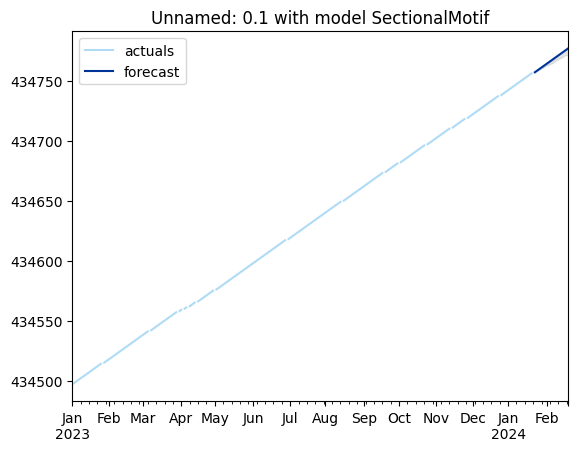

In [11]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False